# k-Nearest Neighbors (k-NN)

The k-nearest neighbors algorithm is a supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric method that makes predictions based on the similarity of the input data to its neighbors. The algorithm assumes that similar data points tend to have similar labels.

In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

df = load_dataset("tips")    # Trying to find tips from total_bill 
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[["total_bill"]], df["tip"], test_size=0.3, random_state=42)
len(X_train), len(X_test)

(170, 74)

The `k` in k-NN refers to the number of nearest neighbors that will be considered when making predictions. The algorithm calculates the distance between the input data and all the training data points, selects the `k` nearest neighbors, and determines the class or value based on the majority vote (for classification) or averaging (for regression) of the neighbors.

Before implementing the k-NN algorithm, you need to decide the value of `k`, i.e., the number of nearest neighbors to consider. The choice of `k` depends on the dataset and problem at hand. 

- **Small k (Overfitting):** When the value of k is small, the k-NN algorithm can suffer from overfitting. Overfitting occurs when the model becomes too complex and tries to fit the training data too closely, leading to poor generalization on unseen data. In the case of small k, the decision boundary can become highly irregular and sensitive to noise in the training data. The model can end up capturing the noise or specific patterns in the training set, which may not generalize well to new data.

- **Large k (Underfitting):** Conversely, when the value of k is large, the k-NN algorithm can suffer from underfitting. Underfitting occurs when the model is too simple and fails to capture the underlying patterns in the data. In the case of large k, the decision boundary becomes smoother and less sensitive to noise. The model may oversimplify the data and fail to capture intricate patterns, resulting in high bias and low variance.

![KNN Overfitting and Underfitting](https://miro.medium.com/v2/resize:fit:778/1*4nN7X1FDTd9x7rUsxnRlrw.png)

If `n` be the total number of data points then from the figure above we can draw the insight that:
- When `k=1`, decision surface becomes more zig-zagged i.e. the system is doing more work to remove noisy outliers or to fit to the system. The process is known as overfitting. This works perfectly for the training set, because we know both the labels and features of our data for training set. But when it comes to unseen data, overfitted model fails to conserve the performance.
- when `k=n` the decision surface is smooth i.e. the system is not doing any work to remove the noisy outliers. This process is known as underfitting. Let's say we have `n=1000` where 600 data points belong to positive group and remaining 400 to negative group. When `k=n` whatever the type of given point be, it takes 600 positive neighbors and 400 negative neighbors. So the final result will be positive no matter what class it represents. This is underfitting.

So in order to remove overfitting and underfitting, we need to choose the right value of `k` for our problem. This can be achieved using cross-validation set of data.

In [70]:
# Plot the data 
def plot_predict(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=None):
    """
    Plots training data, test data, and compares predictions.
    """
    plt.figure(figsize=(8, 4))
    if predictions is None:
        # Plot training data in blue
        plt.scatter(train_data, train_labels, c="b", s=8, label="Train Data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=8, label="Test Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=8, label="Predicted Data")

    # Set labels for x and y axes
    plt.xlabel("Total Bill")
    plt.ylabel("Tips")

    # Show legend
    plt.legend(prop={"size": 12})

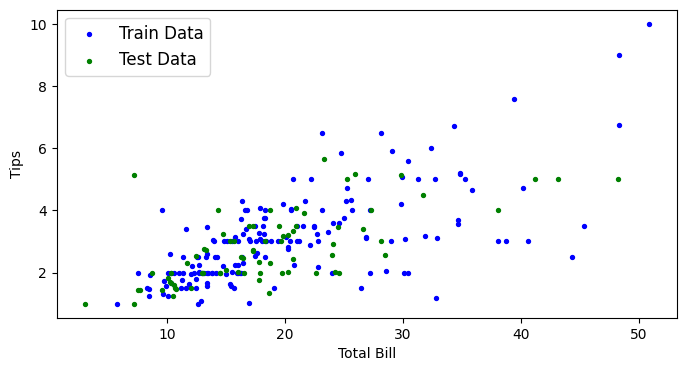

In [71]:
plot_predict()


## Cross-Validation

Cross-validation is a resampling technique used to assess the performance and generalization ability of a machine learning model. It helps in estimating how well the model will perform on unseen data by simulating the model's performance on multiple subsets of the available data.

The basic idea behind cross-validation is to split the dataset into multiple subsets called "folds." The model is trained on a subset of the data called the "training set" and evaluated on the remaining portion of the data called the "validation set". The validation set is used as a test-set during the training period. This process is repeated several times, with different subsets of the data serving as the validation set each time. During these iterations we choose the value of `k` that minimizes the loss for validation set.

### k-fold cross-validation

In k-fold cross-validation `k` represents the number of folds. Let's see step by step overview of k-fold cross-validation.

- Start by splitting your dataset into two parts: a training set and a test set. The training set will be used for model training and validation, while the test set will be kept aside for final evaluation. Typically, a common split is 70-80% of the data for training and 20-30% for testing.
- Determine the value of `k`, which represents the number of folds or subsets to divide the training data into. A common choice is `k = 5` or `k = 10`, but you can experiment with different values depending on the size of your dataset.
- Divide the training set into `k` equally sized folds or subsets. Each fold should ideally have a similar distribution of samples. For example, if you have 100 samples and choose `k = 5`, each fold would contain 20 samples.
- Perform the following steps `k` times:
    - Choose one fold as the validation set and keep it aside. This fold will be used for evaluating the model.
    - Train your model using the remaining `k-1` folds (the training set).
    - Use the trained model to make predictions on the validation set (the fold that was kept aside). Calculate the performance metrics of interest, such as accuracy, precision, recall, or others.
    - Repeat steps `a` to `c` for each fold, ensuring that each fold serves as the validation set exactly once.
- Once the k-fold cross-validation process is complete, calculate the average performance metric across all the folds. This provides an overall estimate of the model's performance.
- Analyze the performance metrics obtained from the cross-validation process to select the best-performing model or tune the model's hyperparameters. You can compare the performance of different models or different sets of hyperparameters across the folds to make an informed decision.
- After selecting the best model or hyperparameters using cross-validation, evaluate the final model on the separate test set that was initially set aside. This provides an unbiased estimate of the model's performance on completely unseen data.

Remember: k-fold cross-validation maximizes the use of available data, provides a more reliable estimate of the model's performance, and helps in selecting the best model or hyperparameters.

## Determining Overfitting and Underfitting

Before understanding overfitting and underfitting we need to have some primal informations. The error on the training set is known as training error. Similarly validation error and test error are the errors on validation set and test set respectively. Also error is calculates as:

$error = 1 - accuracy$

![Determining Overfitting and Underfitting](https://miro.medium.com/v2/resize:fit:700/1*K_j-NgpOq203S2Ft-qMhwg.png)

From the figure above we can draw the insight that:

- If both validation error and training error are high, we are overfitting
- If validation error is high but training error is low, we are underfitting

## Implementing KNN

Now, let's dive into the step-by-step process of implementing the k-NN algorithm.

### Step 1: Collect and Preprocess the Data
The first step is to collect and preprocess the data. Ensure that your data is properly labeled for classification tasks or contains corresponding output values for regression tasks. Also, make sure to handle any missing or inconsistent data.

### Step 2: Determine the Value of k
Before implementing the k-NN algorithm, you need to decide the value of k, i.e., the number of nearest neighbors to consider. The choice of k depends on the dataset and problem at hand. A small value of k may lead to overfitting, while a large value may result in underfitting. Experimentation and cross-validation techniques can help determine the optimal value for k.

### Step 3: Define a Distance Metric
To calculate the similarity or distance between data points, you need to define a distance metric. The most commonly used distance metric is Euclidean distance. For two points (x1, y1) and (x2, y2), the Euclidean distance is calculated as:

```python
distance = sqrt((x2 - x1)^2 + (y2 - y1)^2)
```

However, depending on the type of data and problem, other distance metrics like Manhattan distance, Minkowski distance, or cosine similarity can also be used.

### Step 4: Implement the k-NN Algorithm

Now, let's implement the k-NN algorithm. We'll cover both the classification and regression versions.

- **Classification**
    - Load the training dataset.
    - Load the test data for which you want to predict the labels.
    - For each test data point:
        - Calculate the distance between the test point and all the training data points using the chosen distance metric.
        - Sort the distances in ascending order.
        - Select the top k nearest neighbors.
        - Determine the majority class of the k neighbors.
        - Assign the majority class as the predicted label for the test point.
    - Evaluate the accuracy of the predictions by comparing them with the true labels.

- **Regression**
    - Load the training dataset.
    - Load the test data for which you want to predict the values.
    - For each test data point:
        - Calculate the distance between the test point and all the training data points using the chosen distance metric.
        - Sort the distances in ascending order.
        - Select the top k nearest neighbors.
        - Determine the average value of the k neighbors.
        - Assign the average value as the predicted value for the test point.
    - Evaluate the performance of the predictions using appropriate metrics like mean squared error (MSE) or R-squared.

### Step 5: Evaluate and Tune the Model
Once you have implemented the k-NN algorithm, it's crucial to evaluate the model's performance. For classification tasks, you can use metrics like accuracy, precision, recall, or F1-score. For regression tasks, metrics like MSE, R-squared, or mean absolute error (MAE) can be used.

You can also fine-tune the model by experimenting with different values of k, trying different distance metrics, or applying feature scaling techniques to normalize the data.

`Example:` k-NN for Classification

Let's walk through an example of using k-NN for a classification task. We'll consider a dataset with two features (x1 and x2) and two classes (A and B).

1. Collect and preprocess the data.
2. Determine the value of k, let's say k = 3.
3. Define the distance metric, which will be the Euclidean distance.
4. Implement the k-NN algorithm.

Suppose we have the following training dataset:

| Data Point | x1 | x2 | Class |
|:-:|:-:|:-:|:-:|
| 1	| 1.0 | 1.1 |A |
| 2	| 1.0 | 1.0 |A |
| 3	| 0.0 | 0.0 |B |
| 4	| 0.0 | 0.1 |B |

And the test dataset:

|Test Point	| x1 | x2 |
|:-:|:-:|:-:|
|5 | 0.9 | 0.8 |

Let's calculate the distances between the test point (5) and the training points:

- $Distance(5,1) = \sqrt{(1.0 - 0.9)^2 + (1.1 - 0.8)^2} = 0.3$
- $Distance(5,2) = \sqrt{(1.0 - 0.9)^2 + (1.0 - 0.8)^2} = 0.223$
- $Distance(5,3) = \sqrt{(0.0 - 0.9)^2 + (0.0 - 0.8)^2} = 1.13$
- $Distance(5,4) = \sqrt{(0.0 - 0.9)^2 + (0.1 - 0.8)^2} = 1.18$

Sorting the distances in ascending order, we get: 0.223, 0.3, 1.13, 1.18

The top `k` neighbors are: (2, 1), (1, 1), (4, B)

The majority class among the `k` neighbors is `A`, so the predicted label for the test point `(5)` is `A`.

In [72]:
# Initialize and fit the KNN regressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [73]:
# Predict on the testing set
y_pred = model.predict(X_test)

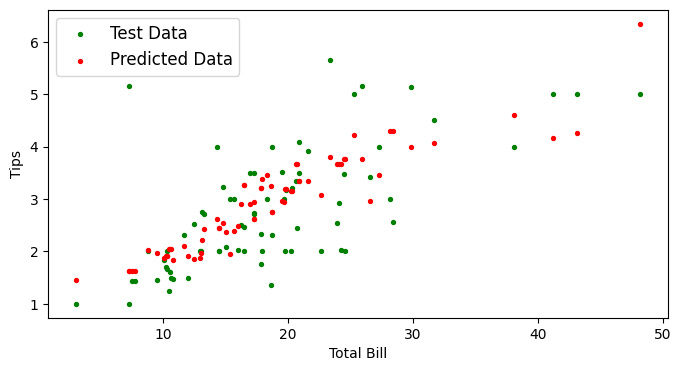

In [74]:
# Plot true vs predicted values
plot_predict(predictions=y_pred)

In [80]:
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    root_mean_squared_error
)

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
 
print("MAE:", round(mae, 4), "--- MSE:", round(mse, 4), "--- RMSE:", round(rmse, 4))

MAE: 0.7202 --- MSE: 0.8681 --- RMSE: 0.9317


## References:
- [ScikitLearn Documentation on KNNRegression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
- [Blog on KNN Regressor](https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/)
- [Video on KNN Regression](https://www.youtube.com/watch?v=0p0o5cmgLdE)
- [Detailed Mathematical Explanation](https://www.youtube.com/watch?v=IPqZKn_cMts)